In [1]:
!unzip "/content/drive/MyDrive/4 курс/NLP/ДЗ1/public_data (1).zip"

Archive:  /content/drive/MyDrive/4 курс/NLP/ДЗ1/public_data (1).zip
  inflating: test_data.csv           
  inflating: train_data.csv          
  inflating: train_solution.csv      


In [2]:
!unzip "/content/drive/MyDrive/4 курс/NLP/ДЗ1/archive (3).zip"

Archive:  /content/drive/MyDrive/4 курс/NLP/ДЗ1/archive (3).zip
  inflating: News_Category_Dataset_v3.json  


In [4]:
!cp "/content/drive/MyDrive/4 курс/NLP/ДЗ1/students_dubki_chat.csv" .
!cp "/content/drive/MyDrive/4 курс/NLP/ДЗ1/nlp_chat.csv" .

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
from nltk.corpus import stopwords
import nltk 
from nltk.tokenize import TweetTokenizer

In [ ]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)
nltk.download("stopwords")
tknzr = TweetTokenizer()
nltk.download('punkt')

# NEW_data

In [6]:
# df = pd.read_json('/content/News_Category_Dataset_v3.json', lines=True)

In [ ]:
# new_data = df[df['category'] == 'STYLE & BEAUTY'].short_description
# categoty = pd.Series([2 for i in range(len(new_data))])

In [ ]:
# new_data = pd.DataFrame(new_data).reset_index()

In [ ]:
# new_data['category'] = pd.Series([2 for i in range(len(new_data))])

In [ ]:
# new_data =new_data.drop('index', axis=1)

In [ ]:
# len(new_data)

9814

In [ ]:
# new_data.sample(20)

,short_description,category
4806,Time for a report kard.,2
4333,From extra bold stripes and updated tropicals ...,2
5730,"While we love seeing all the exciting, innovat...",2
4385,"In the glitzy world of celebrity hairstylists,...",2
6501,Want more? Be sure to check out HuffPost Style...,2
4684,Ready to be really jealous?,2
6670,"Five little seasons ago, Twitter seemed very a...",2
8033,"Yesterday William and Catherine, who were only...",2
9599,"For many, this comes as a surprise, as it was ...",2
2753,"See more photos from the big day: ""I'll remind...",2


In [ ]:
# new_data.to_csv('new_data_fashion.csv')

In [ ]:
# del df
# del new_data

# DATA_for_CNN

In [36]:
df = pd.read_csv("train_data.csv")
labels = pd.read_csv("train_solution.csv")

In [37]:
df = df.merge(labels, left_on='id', right_on='id')


In [38]:
df.head()

,id,message,category
0,271828,"Over $616 million in Bitcoin was electrocated in September with Wrapped Bitcoin (WBTC) data from CoinDesk. The emissions increased by more than 160 per cent compared to August, when $232 million was currentized. WBTC's output grew along with the demand for over-the-counter (OTC) market, reported by Grapefruit Trading. It became one of the first OTC platforms to release WBTC via the BitGo service. The Grapefruit Trading Trader Getty Hill claims that clients' interest in translating bitcoin into WBTC comes from their desire to use the first cryptation in the decentralized finance ecosystem (DeFi). CEO's FTX Exchange Sam Bankman-Frid acknowledged that the demand for WBTC at the OTC market remained significant, though not as high as it had been in previous months during the rapid rise o...",1
1,271829,Quiz: Thursday or friday?,0
2,271830,"The Australian Revenue Authority will start collecting taxes from crypto transactions this year. The Authority has developed methods to search for and identify cryptovaly investors. In March 2018, the Australian Revenue Authority announced that the forthcoming identification process would involve AML and bilateral agreements. The data comparison method will also be used to deonymize buyers of crypthalates. Tax agent Liz Russell notes that most users will soon be identified and their debts will be known. The authorities believe that, because of Bitcoin's recent strong appreciation to $200,000, investors could have earned profits that were not recorded in their tax obligations. If users have suffered losses, these amounts can be deducted from taxable profits. The Authority recalls tha...",1
3,271831,Let's continue😉. I present to you my new review,2
4,271832,Here comes your future palette.,2


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3844 entries, 0 to 3843
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3844 non-null   int64 
 1   message   3844 non-null   object
 2   category  3844 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 120.1+ KB


In [40]:
# new_data = pd.read_csv('/content/new_data_fashion.csv')

In [41]:
# new_data

In [42]:
# new_data = new_data.rename(columns={"Unnamed: 0": "id", "short_description": "message"})

In [43]:
# new_data.info()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3844 entries, 0 to 3843
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3844 non-null   int64 
 1   message   3844 non-null   object
 2   category  3844 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 120.1+ KB


In [45]:
df.shape

(3844, 3)

In [46]:
# len(new_data) + len(df)

In [47]:
# df = pd.concat([df, new_data], axis=0)

In [48]:
df

,id,message,category
0,271828,"Over $616 million in Bitcoin was electrocated in September with Wrapped Bitcoin (WBTC) data from CoinDesk. The emissions increased by more than 160 per cent compared to August, when $232 million was currentized. WBTC's output grew along with the demand for over-the-counter (OTC) market, reported by Grapefruit Trading. It became one of the first OTC platforms to release WBTC via the BitGo service. The Grapefruit Trading Trader Getty Hill claims that clients' interest in translating bitcoin into WBTC comes from their desire to use the first cryptation in the decentralized finance ecosystem (DeFi). CEO's FTX Exchange Sam Bankman-Frid acknowledged that the demand for WBTC at the OTC market remained significant, though not as high as it had been in previous months during the rapid rise o...",1
1,271829,Quiz: Thursday or friday?,0
2,271830,"The Australian Revenue Authority will start collecting taxes from crypto transactions this year. The Authority has developed methods to search for and identify cryptovaly investors. In March 2018, the Australian Revenue Authority announced that the forthcoming identification process would involve AML and bilateral agreements. The data comparison method will also be used to deonymize buyers of crypthalates. Tax agent Liz Russell notes that most users will soon be identified and their debts will be known. The authorities believe that, because of Bitcoin's recent strong appreciation to $200,000, investors could have earned profits that were not recorded in their tax obligations. If users have suffered losses, these amounts can be deducted from taxable profits. The Authority recalls tha...",1
3,271831,Let's continue😉. I present to you my new review,2
4,271832,Here comes your future palette.,2
...,...,...,...
3839,275667,"On the air, the shooter's kms and the man who asked about the favourite subpoena were poking his eyeballs with an elgey style, but instead of the Sionar Booooy, he started talking about the saying about the mistress, the borsch, and the pots. Well, you know, the good mistress of the borsche in any pot tastes good. Anyway, no matter what!!! Publicly, I refuse my words because today I painted the arrows of SHIT!!!!!! It's some kind of hell, I swear. If there's hell, it's where I talk to people all the time and draw the arrows with a brush. Anyway, it turns out I had a very limited function: I could draw the brand arrows with a pencil, a liquid substrate with a thin brush, and a marker-shaped liner. That's the secret to success. Why did I get in the wrong place at all? I don't know wha...",2
3840,275668,This shit that's off-the-books.,0
3841,275669,"Time to go to the sky, tabor.",2
3842,275670,uraaaaaaaa,0


In [49]:
dubki_chat.shape

(10000, 2)

In [50]:
nlp_chat.shape

(417, 2)

In [51]:
dubki_chat = pd.read_csv('/content/students_dubki_chat.csv')

In [52]:
dubki_chat = dubki_chat[['message', 'category']]

In [53]:
nlp_chat = pd.read_csv('/content/nlp_chat.csv')
nlp_chat = nlp_chat[['message', 'category']]

In [54]:
df = pd.concat([df, dubki_chat, nlp_chat], axis=0)

In [55]:
df.drop(['id'],axis=1,inplace=True)

In [56]:
df.shape

(14261, 2)

In [57]:
df.sample(50)

,message,category
6606,Mind my taser,0
2487,"I heard that ddx is cool, I myself go there only to the gym",0
3537,although most of the residents left the hostel,0
484,"The pruffs. The assistant likes freckles, too.",2
8163,Charit exactly charit,0
3670,I've been a mason for three days.,0
2443,How do you know if it's free access? Is it if he's taken a course before?,0
845,"Moreover, you need to regularly purchase paper and ink for a public printer, and for this you also need to knock money out of someone",0
5262,That's where a number of these shops opened right next to the exit from the station,0
4275,preferably 3k,0


In [ ]:
df = df[df['category'] != 1]

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22447 entries, 1 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   message   22447 non-null  object
 1   category  22447 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 526.1+ KB


In [ ]:
df.isnull().sum()

message     0
category    0
dtype: int64

In [ ]:
!pip install -q pymorphy2

In [ ]:
import pymorphy2
from functools import lru_cache
from multiprocessing import Pool
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as tqdm
import re

In [ ]:
m = pymorphy2.MorphAnalyzer()

regex = re.compile("[А-Яа-я:=!\)\()A-z\_\%/|]+")

def words_only(text, regex=regex):
    try:
        return regex.findall(text)
    except:
        return []

def tweeter_only(text, regex=regex):
    try:
        return tknzr.tokenize(text)
    except:
        return []
def lemmatize(text, pymorphy=m):
    try:
        return " ".join([pymorphy.parse(w)[0].normal_form for w in text])
    except:
        return " "    
def clean_text(text):
    return lemmatize(words_only(text))

### TFIDF

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df , test_size=0.25, random_state=42, shuffle=True)

In [ ]:
with Pool(8) as p:
    lemmas = list(tqdm(p.imap(clean_text, X_train['message']), total=len(X_train)))

X_train['lemmas'] = lemmas
X_train.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/16835 [00:00<?, ?it/s]

,message,category,lemmas
3684,Now it's time to open the first map of my internal changes: now I will write periodically for,2,now it s time to open the first map of my internal changes: now i will write periodically for
4079,The bust line combined with the sheer side paneling made the look a wardrobe malfunction just waiting to happen. Thankfully,2,the bust line combined with the sheer side paneling made the look a wardrobe malfunction just waiting to happen thankfully
6096,See some more Gisele Bundchen ads. Is she a good replacement for Kate Moss? Want more? Be sure to check out HuffPost Style,2,see some more gisele bundchen ads is she a good replacement for kate moss want more be sure to check out huffpost style
5500,"Hat hair isn't completely avoidable, but you can revive it. ""Leave-in conditioners add moisture to hair, which will help",2,hat hair isn t completely avoidable but you can revive it leave in conditioners add moisture to hair which will help
1362,And how long does it work?,0,and how long does it work
8435,From Keiko Lynn: I'm writing this post at almost five in the morning; I can't sleep because I have a killer earache. Courtesy,2,from keiko lynn: i m writing this post at almost five in the morning i can t sleep because i have a killer earache courtesy
1026,not in this decade =),0,not in this decade =)
102,"Tolya, you had a date at 9:30.",0,tolya you had a date at :
4478,but it took a long time to make,0,but it took a long time to make
8077,"The fact remains that people have a deep, meaningful, even conjugal, relationship with their jeans. A favorite pair of jeans might be harder to part with than (perhaps) a loved one.",2,the fact remains that people have a deep meaningful even conjugal relationship with their jeans a favorite pair of jeans might be harder to part with than (perhaps) a loved one


In [ ]:
with Pool(8) as p:
    lemmas = list(tqdm(p.imap(clean_text, X_test['message']), total=len(X_test)))

X_test['lemmas'] = lemmas
X_test.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/5612 [00:00<?, ?it/s]

,message,category,lemmas
1379,"Serge Normant Healthy Hair Collection Shampoo and Conditioner $29.99, Costco.com I'm talking Prada leather handbags, blinged",2,serge normant healthy hair collection shampoo and conditioner costco com i m talking prada leather handbags blinged
3681,"We finished two years of education, it seems that the system doesn't differentiate between Bachelors and Masters",0,we finished two years of education it seems that the system doesn t differentiate between bachelors and masters
3717,"PHOTOS: Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle",2,photos: want more be sure to check out huffpost style on twitter facebook tumblr pinterest and instagram at huffpoststyle
3568,Who wants a hat? Need a couple more people,0,who wants a hat need a couple more people
7417,"Does anyone have Aristotle's ""Politics""? Change to Plato",0,does anyone have aristotle s politics change to plato
8813,"Guys, does anyone have a clipper?)",0,guys does anyone have a clipper )
6555,I hope I don't offend anyone with my interest!,0,i hope i don t offend anyone with my interest!
9618,From Trop Rouge: Found a park to explore on one of my last days in Copenhagen. Snuggling up in a new vintage coat I picked,2,from trop rouge: found a park to explore on one of my last days in copenhagen snuggling up in a new vintage coat i picked
4914,"There is something truly unique about New York City around the holidays. Every year, my family and I head into Manhattan to spend the day skating (for my boys), shopping (for me) and stopping by a few of our favorite spots.",2,there is something truly unique about new york city around the holidays every year my family and i head into manhattan to spend the day skating (for my boys) shopping (for me) and stopping by a few of our favorite spots
6772,"But today, thanks to a Twitter tip, we came upon the GREATEST TWINSIES OF ALL TIME: President Obama and Ann Romney. But regardless",2,but today thanks to a twitter tip we came upon the greatest twinsies of all time: president obama and ann romney but regardless


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=4000, min_df=10, max_df=0.8, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(X_train.lemmas.to_list()).toarray()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
log_reg = LogisticRegression(random_state=0, solver="newton-cg")
log_reg.fit(X, X_train['category']) 

LogisticRegression(random_state=0, solver='newton-cg')

In [ ]:
classifier = RandomForestClassifier(n_estimators=400, random_state=2)
classifier.fit(X, X_train['category']) 

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

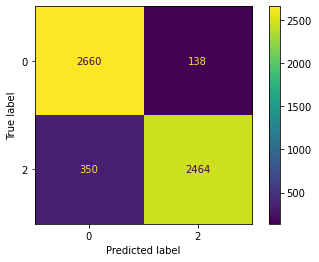

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2798
           2       0.95      0.88      0.91      2814

    accuracy                           0.91      5612
   macro avg       0.92      0.91      0.91      5612
weighted avg       0.92      0.91      0.91      5612

accuracy_score =  0.9130434782608695


In [ ]:
X_test_array = tfidfconverter.transform(X_test.lemmas.to_list()).toarray()
y_pred = log_reg.predict(X_test_array)

cm = confusion_matrix(X_test['category'],y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
disp.plot()

plt.show()
print(classification_report(X_test['category'],y_pred))
print('accuracy_score = ', accuracy_score(X_test['category'], y_pred))

# Submition for double model

In [ ]:
!cp '/content/drive/MyDrive/4 курс/NLP/ДЗ1/RandomForestClassifier.joblib' .
!cp '/content/drive/MyDrive/4 курс/NLP/ДЗ1/TfidfVectorizer.joblib' . 

In [ ]:
from joblib import dump, load

In [ ]:
model_bitcoin_classifier = load('RandomForestClassifier.joblib')
model_bitcoin_tfidfconverter = load('TfidfVectorizer.joblib')

In [ ]:
submition = pd.read_csv('test_data.csv')

In [ ]:
submition

,id,message
0,275672,But a lot of people have a job fair tonight.
1,275673,"Also, I got only 4 answers on the google form ..."
2,275674,"Vladimir, when will we have seminar?"
3,275675,"A couple at 111, too?"
4,275676,"It's on Anti-buying. And again, Zara:"
...,...,...
5922,3143750,"The second thing, write all questions and thoughts about statistics in this doc:"
5923,3143751,Can Grayscale Actually Sell Bitcoin (BTC) After Unlock of GBTC Shares?
5924,3143752,It's not a very operational dude putting them on the schedule. Wednesday is the first two online.
5925,3143753,"Inspired by Sonia Miro's goddess and made a hell of a shooter. Lyner is a cat eyes Art Vision. It's not exactly sturdy, but it's thin enough for TV and CREATIVA."


In [ ]:
with Pool(8) as p:
    lemmas = list(tqdm(p.imap(clean_text, submition['message']), total=len(submition)))
submition['lemmas'] = lemmas
submition.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/5927 [00:00<?, ?it/s]

,id,message,lemmas
1951,277624,"Whoa, whoa. Isn't that the zip archive by accident?",whoa whoa isn t that the zip archive by accident
1165,276837,"I didn't sign up for this class, but it's just interesting that he's a big crossover with the mains. Aren't you afraid to miss too much? 'Cause I'd sign up for that, too.",i didn t sign up for this class but it s just interesting that he s a big crossover with the mains aren t you afraid to miss too much cause i d sign up for that too
2929,278605,"Examples from the site. In Atrium today, I saw it all alive.",examples from the site in atrium today i saw it all alive
5238,3143066,"The B2B2C (Better Than a Banking Platform) was the third largest shareholder of the Maxwell Bank. The exact amount of the transaction is unknown. Maxwell is a licensed bank in Iowa. The bank's assets are $30 million, deposits are $25 million. President Maxwell Ronald Ingram, who had previously launched several Fintech projects, purchased the bank in January of this year. Ingram has developed a bank development road map, which includes enhancing its cybersecurity and services. He plans to do so by working with the leaders of financial technology in the areas of security, telecommunications and infrastructure companies.",the b b c (better than a banking platform) was the third largest shareholder of the maxwell bank the exact amount of the transaction is unknown maxwell is a licensed bank in iowa the bank s assets are million deposits are million president maxwell ronald ingram who had previously launched several fintech projects purchased the bank in january of this year ingram has developed a bank development road map which includes enhancing its cybersecurity and services he plans to do so by working with the leaders of financial technology in the areas of security telecommunications and infrastructure companies
3392,279069,"ℹ️ While holders of the aforementioned tokens, as of August 18, 2017 will automatically receive IND tokens during the Airdrop, holders can register for this Airdrop at",while holders of the aforementioned tokens as of august will automatically receive ind tokens during the airdrop holders can register for this airdrop at
3446,279123,Move,move
4960,3142788,Didn't you guys try to get into the course through Student's and Washington's emails to bail out? It's just how I managed to get into the course.,didn t you guys try to get into the course through student s and washington s emails to bail out it s just how i managed to get into the course
5629,3143457,"And for the visualians, I'm attaching a gif! (I've learned to combine it with a photo, MAMA, I'm almost Zuckerberg!)",and for the visualians i m attaching a gif! (i ve learned to combine it with a photo mama i m almost zuckerberg!)
5034,3142862,"""Antifriture""",antifriture
5678,3143506,"The Russian laboratorium brand (very fond of their washing foam and fatty skin tonic) has a line of retinol serums: serums with 1%, 2%, and the so-called blue retinol, the equivalent of retinol based on the extract of blue algae. It's 700 rubles, I want to try 2%.",the russian laboratorium brand (very fond of their washing foam and fatty skin tonic) has a line of retinol serums: serums with % % and the so called blue retinol the equivalent of retinol based on the extract of blue algae it s rubles i want to try %


In [ ]:
X_test_array = model_bitcoin_tfidfconverter.transform(submition.lemmas.to_list()).toarray()
y_pred = model_bitcoin_classifier.predict(X_test_array)

In [ ]:
pd.Series(y_pred).value_counts()

0    5014
1     913
dtype: int64

In [ ]:
submition['category_is_bitcoin'] = y_pred

In [ ]:
submition

,id,message,lemmas,category_is_bitcoin
0,275672,But a lot of people have a job fair tonight.,but a lot of people have a job fair tonight,0
1,275673,"Also, I got only 4 answers on the google form ...",also i got only answers on the google form,0
2,275674,"Vladimir, when will we have seminar?",vladimir when will we have seminar,0
3,275675,"A couple at 111, too?",a couple at too,0
4,275676,"It's on Anti-buying. And again, Zara:",it s on anti buying and again zara:,0
...,...,...,...,...
5922,3143750,"The second thing, write all questions and thoughts about statistics in this doc:",the second thing write all questions and thoughts about statistics in this doc:,0
5923,3143751,Can Grayscale Actually Sell Bitcoin (BTC) After Unlock of GBTC Shares?,can grayscale actually sell bitcoin (btc) after unlock of gbtc shares,1
5924,3143752,It's not a very operational dude putting them on the schedule. Wednesday is the first two online.,it s not a very operational dude putting them on the schedule wednesday is the first two online,0
5925,3143753,"Inspired by Sonia Miro's goddess and made a hell of a shooter. Lyner is a cat eyes Art Vision. It's not exactly sturdy, but it's thin enough for TV and CREATIVA.",inspired by sonia miro s goddess and made a hell of a shooter lyner is a cat eyes art vision it s not exactly sturdy but it s thin enough for tv and creativa,0


In [ ]:
X_ans = tfidfconverter.transform(submition.lemmas.to_list())
ans = log_reg.predict(X_ans)


In [ ]:
submition['class_0_or_class_2'] = ans

In [ ]:
submition.class_0_or_class_2.value_counts()

0    4107
2    1820
Name: class_0_or_class_2, dtype: int64

In [ ]:
submition.sample(3)

,id,message,lemmas,category_is_bitcoin,class_0_or_class_2
241,275913,You can go to yuri's revenge or whatever.,you can go to yuri s revenge or whatever,0,0
3946,3141774,"micro-trend of 2021, we saw it in summer collections, we also see it in autumn-winter ones. A catsuit is a straightforward manifestation of the skin-tight trend and an alternative to oversize. As such, catsuits looked on the podium - it's understandable, but in real life? The most ardent fan is",micro trend of we saw it in summer collections we also see it in autumn winter ones a catsuit is a straightforward manifestation of the skin tight trend and an alternative to oversize as such catsuits looked on the podium it s understandable but in real life the most ardent fan is,0,2
1441,277113,"I'm told there's gonna be a black Friday on the website of Zara and Massimo Dutti today at 9:00 p.m. (which I didn't want to write about, but for some reason I'm writing). All of a sudden, you've been looking at something a long time, and you're gonna be able to cut off the discount. The Massimo Dutti app has been running since 7:00 p.m.",i m told there s gonna be a black friday on the website of zara and massimo dutti today at : p m (which i didn t want to write about but for some reason i m writing) all of a sudden you ve been looking at something a long time and you re gonna be able to cut off the discount the massimo dutti app has been running since : p m,0,2


In [ ]:
ans = []
for index, row in submition.iterrows():
    if row['category_is_bitcoin'] == 1:
        ans.append(1)
    else:
        ans.append(row['class_0_or_class_2'])

In [ ]:
submition['category'] = pd.Series(ans)

In [ ]:
answer_for_only_1_class = submition[['id', 'category']]

In [ ]:
answer_for_only_1_class.head()

,id,category
0,275672,2
1,275673,0
2,275674,0
3,275675,0
4,275676,0


In [ ]:
answer_for_only_1_class['category'].value_counts()

0    3767
2    1247
1     913
Name: category, dtype: int64

In [ ]:
answer_for_only_1_class.to_csv("ans.csv", index = False)

### CNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df , test_size=0.25, random_state=42, shuffle=True)

In [ ]:
with Pool(8) as p:
    lemmas = list(tqdm(p.imap(clean_text, df['message']), total=len(df)))

df['lemmas'] = lemmas
df.sample(10)

In [ ]:
df.to_csv("data.csv", index=False)

In [ ]:
root = "/content/"
filename = "data.csv"
data = pd.read_csv(root+filename).sample(
    frac = 1, random_state = 202)
data.head()

In [ ]:
import spacy
import string

In [ ]:
#tokenization
tok = spacy.load("en_core_web_sm")
def tokenize (text):
    text = re.sub(r"[^\x00-\x7F]+", " ", text)
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]') # remove punctuation and numbers
    nopunct = regex.sub(" ", text.lower())
    return [token.text for token in tok.tokenizer(nopunct)]

In [ ]:
#tokenization
def tokenize (text):
    try:
        return text.split()
    except:
        return []

In [ ]:
data.loc[1084]

In [ ]:
from collections  import Counter

In [ ]:
counts = Counter()
for index, row in data.iterrows():
    try:
        counts.update(tokenize(row['lemmas']))
    except:
        pass

In [ ]:
#deleting infrequent words
print("num_words before:",len(counts.keys()))
for word in list(counts):
    if counts[word] < 2:
        del counts[word]
print("num_words after:",len(counts.keys()))

In [ ]:
#creating vocabulary
vocab2index = {"":0, "UNK":1}
words = ["", "UNK"]
for word in counts:
    vocab2index[word] = len(words)
    words.append(word)

In [ ]:
def encode_sentence(text, vocab2index, N=40):
    tokenized = tokenize(text)
    encoded = np.zeros(N, dtype=int)
    enc1 = np.array([vocab2index.get(word, vocab2index["UNK"]) for word in tokenized])
    length = min(N, len(enc1))
    encoded[:length] = enc1[:length]
    return encoded, length

In [ ]:
data['encoded'] = data['lemmas'].apply(lambda x: np.array(encode_sentence(x,vocab2index)))
data.head()

In [ ]:
from torch.utils.data import Dataset
import torch

In [ ]:
class ReviewsDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.X)

    def get_labels(self):
        return self.y

    def __getitem__(self, idx):
        if self.y is None:
            return torch.from_numpy(self.X[idx][0].astype(np.int32)), 1, self.X[idx][1]
        return torch.from_numpy(self.X[idx][0].astype(np.int32)), self.y[idx], self.X[idx][1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import re
import spacy
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import string
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import mean_squared_error

In [ ]:
X = list(data['encoded'])
y = list(data['category'])
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [ ]:
train_ds = ReviewsDataset(X_train, y_train)
valid_ds = ReviewsDataset(X_valid, y_valid)

In [ ]:
next(iter(train_ds))

In [ ]:
def train_model(model, epochs=10, lr=0.001):
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=lr)
    for i in range(epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for x, y, l in train_dl:
            x = x.long()
            y = y.long()
            y_pred = model(x, l)
            optimizer.zero_grad()
            loss = F.cross_entropy(y_pred, y)
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        val_loss, val_acc, val_rmse = validation_metrics(model, val_dl)
        if i % 5 == 1:
            print("train loss %.3f, val loss %.3f, val accuracy %.3f, and val rmse %.3f" % (sum_loss/total, val_loss, val_acc, val_rmse))

def validation_metrics (model, valid_dl):
    model.eval()
    correct = 0
    total = 0
    sum_loss = 0.0
    sum_rmse = 0.0
    for x, y, l in valid_dl:
        x = x.long()
        y = y.long()
        y_hat = model(x, l)
        loss = F.cross_entropy(y_hat, y)
        pred = torch.max(y_hat, 1)[1]
        correct += (pred == y).float().sum()
        total += y.shape[0]
        sum_loss += loss.item()*y.shape[0]
        sum_rmse += np.sqrt(mean_squared_error(pred, y.unsqueeze(-1)))*y.shape[0]
    return sum_loss/total, correct/total, sum_rmse/total

In [ ]:
class LSTM_fixed_len(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim) :
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 3)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x, l):
        x = self.embeddings(x)
        x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        return self.linear(ht[-1])

In [ ]:
!pip install torchsampler

In [ ]:
from torchsampler import ImbalancedDatasetSampler


In [ ]:
batch_size = 1000
vocab_size = len(words)
train_dl = DataLoader(train_ds, batch_size=batch_size,
                      sampler=ImbalancedDatasetSampler(train_ds),)
val_dl = DataLoader(valid_ds, batch_size=batch_size)

In [ ]:
# next(iter(train_dl))

In [ ]:
# model_fixed =  LSTM_fixed_len(vocab_size, 50, 100)


In [ ]:
# train_model(model_fixed, epochs=30, lr=0.005)


In [ ]:
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout_proba):
        super().__init__()
        
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.dropout_1 = nn.Dropout(dropout_proba / 2)          
        self.conv_0 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[0], embedding_dim))
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[1], embedding_dim))
        self.conv_2 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[2], embedding_dim))
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout_2 = nn.Dropout(dropout_proba)        
    def forward(self, x):
        #x = [sent len, batch size]
        # x = x.permute(1, 0)
                
        #x = [batch size, sent len]
        embedded = self.embeddings(x)
                
        #embedded = [batch size, sent len, emb dim]
        embedded = embedded.unsqueeze(1)
        embedded = self.dropout_1(embedded)
        
        #embedded = [batch size, 1, sent len, emb dim]
        conved_0 = F.relu(self.conv_0(embedded).squeeze(3))
        conved_1 = F.relu(self.conv_1(embedded).squeeze(3))
        conved_2 = F.relu(self.conv_2(embedded).squeeze(3))
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        pooled_0 = F.max_pool1d(conved_0, conved_0.shape[2]).squeeze(2)
        pooled_1 = F.max_pool1d(conved_1, conved_1.shape[2]).squeeze(2)
        pooled_2 = F.max_pool1d(conved_2, conved_2.shape[2]).squeeze(2)
        
        #pooled_n = [batch size, n_filters]
        cat = self.dropout_2(torch.cat((pooled_0, pooled_1, pooled_2), dim=1))

        #cat = [batch size, n_filters * len(filter_sizes)]
        return self.fc(cat)

In [ ]:
INPUT_DIM = len(words)
EMBEDDING_DIM = 100
N_FILTERS = 100
FILTER_SIZES = [3,4,5]
OUTPUT_DIM = 3
DROPOUT_PROBA = 0.4

In [ ]:
def train_model(model, epochs=10, lr=0.001):
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=lr, weight_decay=1e-3)
    for i in range(epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for x, y, l in train_dl:
            x = x.long()
            y = y.long()
            optimizer.zero_grad()
            y_pred = model(x).squeeze(1)[:y.shape[0]]
            loss = F.cross_entropy(y_pred, y)
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        val_loss, val_acc = validation_metrics(model, val_dl)
        if i % 5 == 1:
            print("train loss %.3f, val loss %.3f, val accuracy %.3f" % (sum_loss/total, val_loss, val_acc))

def validation_metrics (model, valid_dl):
    model.eval()
    sum_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y, l in valid_dl:
            x = x.long()
            y = y.long()
            y_hat = model(x).squeeze(1)[:y.shape[0]]
            loss = F.cross_entropy(y_hat, y)
            pred = torch.max(y_hat, 1)[1]
            correct += (pred == y).float().sum()
            total += y.shape[0]
            sum_loss += loss.item()*y.shape[0]
    return sum_loss/total, correct/total, 



In [ ]:
model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT_PROBA)

In [ ]:
train_model(model, epochs=60, lr=0.005)

In [ ]:
embedded

# 1

In [ ]:
submition = pd.read_csv('test_data.csv')

In [ ]:
submition

,id,message
0,275672,But a lot of people have a job fair tonight.
1,275673,"Also, I got only 4 answers on the google form ..."
2,275674,"Vladimir, when will we have seminar?"
3,275675,"A couple at 111, too?"
4,275676,"It's on Anti-buying. And again, Zara:"
...,...,...
5922,3143750,"The second thing, write all questions and thoughts about statistics in this doc:"
5923,3143751,Can Grayscale Actually Sell Bitcoin (BTC) After Unlock of GBTC Shares?
5924,3143752,It's not a very operational dude putting them on the schedule. Wednesday is the first two online.
5925,3143753,"Inspired by Sonia Miro's goddess and made a hell of a shooter. Lyner is a cat eyes Art Vision. It's not exactly sturdy, but it's thin enough for TV and CREATIVA."


In [ ]:
submition['encoded'] = submition['message'].apply(lambda x: np.array(encode_sentence(x,vocab2index )))
submition.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


,id,message,encoded
0,275672,But a lot of people have a job fair tonight.,"[[1, 33, 456, 5, 286, 365, 33, 2070, 2084, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10]"
1,275673,"Also, I got only 4 answers on the google form ...","[[1, 1, 1063, 338, 1, 2827, 14, 6, 1245, 1997, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 11]"
2,275674,"Vladimir, when will we have seminar?","[[1, 322, 137, 249, 365, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]"
3,275675,"A couple at 111, too?","[[1, 1056, 37, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 5]"
4,275676,"It's on Anti-buying. And again, Zara:","[[1, 14, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]"


In [ ]:
len(submition)

5927

In [ ]:
submition.loc[0]['encoded'][1]

10

In [ ]:
X_ = list(submition['encoded'])
y_ = None

In [ ]:
test_ds = ReviewsDataset(X_, y_)

In [ ]:
test_dl = DataLoader(test_ds, batch_size=batch_size)

In [ ]:
next(iter(test_ds))

(tensor([   1,   33,  456,    5,  286,  365,   33, 2070, 2084,    1,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0], dtype=torch.int32), 1, 10)

In [ ]:
model.eval()

CNN(
  (embeddings): Embedding(16042, 100, padding_idx=0)
  (dropout_1): Dropout(p=0.2, inplace=False)
  (conv_0): Conv2d(1, 100, kernel_size=(3, 100), stride=(1, 1))
  (conv_1): Conv2d(1, 100, kernel_size=(4, 100), stride=(1, 1))
  (conv_2): Conv2d(1, 100, kernel_size=(5, 100), stride=(1, 1))
  (fc): Linear(in_features=300, out_features=3, bias=True)
  (dropout_2): Dropout(p=0.4, inplace=False)
)

In [ ]:
ans = pd.Series()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
for x, _, l in test_dl:
    x = x.long()
    y_pred = model(x)
    pred = torch.max(y_pred, 1)[1]
    ans = pd.concat([ans, pd.Series(pred)])

In [ ]:
pred = torch.max(y_pred, 1)[1]

In [ ]:
ans

0      2
1      0
2      0
3      0
4      0
      ..
922    0
923    0
924    0
925    2
926    0
Length: 5927, dtype: int64

In [ ]:
submition

,id,message,encoded
0,275672,But a lot of people have a job fair tonight.,"[[1, 33, 456, 5, 286, 365, 33, 2070, 2084, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10]"
1,275673,"Also, I got only 4 answers on the google form ...","[[1, 1, 1063, 338, 1, 2827, 14, 6, 1245, 1997, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 11]"
2,275674,"Vladimir, when will we have seminar?","[[1, 322, 137, 249, 365, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]"
3,275675,"A couple at 111, too?","[[1, 1056, 37, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 5]"
4,275676,"It's on Anti-buying. And again, Zara:","[[1, 14, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]"
...,...,...,...
5922,3143750,"The second thing, write all questions and thoughts about statistics in this doc:","[[1, 1213, 1, 566, 316, 4141, 56, 2956, 321, 4312, 41, 79, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 13]"
5923,3143751,Can Grayscale Actually Sell Bitcoin (BTC) After Unlock of GBTC Shares?,"[[1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 11]"
5924,3143752,It's not a very operational dude putting them on the schedule. Wednesday is the first two online.,"[[1, 23, 33, 479, 10675, 1491, 32, 78, 14, 6, 1, 1, 73, 6, 231, 282, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 17]"
5925,3143753,"Inspired by Sonia Miro's goddess and made a hell of a shooter. Lyner is a cat eyes Art Vision. It's not exactly sturdy, but it's thin enough for TV and CREATIVA.","[[1, 152, 1, 1, 2732, 56, 200, 33, 2450, 5, 33, 1, 1, 73, 33, 4445, 1493, 1, 1, 1, 23, 4133, 1, 28, 1, 4449, 544, 45, 1, 56, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 31]"


In [ ]:
submition['category'] = ans.to_list()

In [ ]:
submition

,id,message,encoded,category
0,275672,But a lot of people have a job fair tonight.,"[[1, 33, 456, 5, 286, 365, 33, 2070, 2084, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10]",2
1,275673,"Also, I got only 4 answers on the google form ...","[[1, 1, 1063, 338, 1, 2827, 14, 6, 1245, 1997, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 11]",0
2,275674,"Vladimir, when will we have seminar?","[[1, 322, 137, 249, 365, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]",0
3,275675,"A couple at 111, too?","[[1, 1056, 37, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 5]",0
4,275676,"It's on Anti-buying. And again, Zara:","[[1, 14, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]",0
...,...,...,...,...
5922,3143750,"The second thing, write all questions and thoughts about statistics in this doc:","[[1, 1213, 1, 566, 316, 4141, 56, 2956, 321, 4312, 41, 79, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 13]",0
5923,3143751,Can Grayscale Actually Sell Bitcoin (BTC) After Unlock of GBTC Shares?,"[[1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 11]",0
5924,3143752,It's not a very operational dude putting them on the schedule. Wednesday is the first two online.,"[[1, 23, 33, 479, 10675, 1491, 32, 78, 14, 6, 1, 1, 73, 6, 231, 282, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 17]",0
5925,3143753,"Inspired by Sonia Miro's goddess and made a hell of a shooter. Lyner is a cat eyes Art Vision. It's not exactly sturdy, but it's thin enough for TV and CREATIVA.","[[1, 152, 1, 1, 2732, 56, 200, 33, 2450, 5, 33, 1, 1, 73, 33, 4445, 1493, 1, 1, 1, 23, 4133, 1, 28, 1, 4449, 544, 45, 1, 56, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 31]",2


In [ ]:
answer = submition[['id', 'category']]

In [ ]:
answer.head()

,id,category
0,275672,2
1,275673,0
2,275674,0
3,275675,0
4,275676,0


In [ ]:
answer['category'].value_counts()

0    4080
2    1327
1     520
Name: category, dtype: int64

In [ ]:
answer['category'].value_counts()

0    3838
2    1448
1     641
Name: category, dtype: int64

In [ ]:
answer['category'].value_counts()

0    2789
2    2648
1     490
Name: category, dtype: int64

In [ ]:
answer.to_csv("submission.csv", index = False)

https://jovian.ai/aakanksha-ns/lstm-multiclass-text-classification/v/5?utm_source=embed

In [ ]:
answer[answer['id'] == 275901]

,id,category
229,275901,0


# NEW_data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json('/content/News_Category_Dataset_v3.json', lines=True)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [ ]:
df.category.value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [ ]:
new_data = df[df['category'] == 'STYLE & BEAUTY'].short_description
categoty = pd.Series([2 for i in range(len(new_data))])

In [ ]:
new_data = pd.DataFrame(new_data).reset_index()

In [ ]:
new_data['category'] = pd.Series([2 for i in range(len(new_data))])

In [ ]:
new_data =new_data.drop('index', axis=1)

In [ ]:
len(new_data)

9814

In [ ]:
new_data

,short_description,category
0,"Quick solutions to fix your farmer’s tan, from...",2
1,"Jell-O is bouncy, jiggly and always snaps back...",2
2,Here's what to order now so you'll be itch-fre...,2
3,Ditch the discomfort down there with these der...,2
4,Experts explain the signs of melanoma to look ...,2
...,...,...
9809,Camila Alves' style is proof that you don't ha...,2
9810,From De Lune: Another beautiful day here in NY...,2
9811,From Refinery29: When we tell you Lily Kwong i...,2
9812,WHAT: Two of the fashion industry's most styli...,2


In [ ]:
new_data.to_csv('new_data_fashion.csv')

# CNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df , test_size=0.25, random_state=42, shuffle=True)

In [ ]:
with Pool(8) as p:
    lemmas = list(tqdm(p.imap(clean_text, df['message']), total=len(df)))

df['lemmas'] = lemmas
df.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/22447 [00:00<?, ?it/s]

,message,category,lemmas
2641,And what's stopping you from chatting with your friends at the level of a cabal too?,0,and what s stopping you from chatting with your friends at the level of a cabal too
4307,"Testing in big4, even something like this",0,testing in big even something like this
3140,"how many kidneys for a knife, you have to give?",0,how many kidneys for a knife you have to give
4759,"When considering bunionplasty, it is important to not only consider how the foot will look but also how it will function. Take the time to learn about the methods available to fix your bunion, and you will be that much better off.",2,when considering bunionplasty it is important to not only consider how the foot will look but also how it will function take the time to learn about the methods available to fix your bunion and you will be that much better off
7585,"Boden Polo, American Apparel Skirt, Cole Haan Wristlet, Hue Knee Socks, Marc by Marc Jacobs Loafers Want more? Be sure to",2,boden polo american apparel skirt cole haan wristlet hue knee socks marc by marc jacobs loafers want more be sure to
4944,This model thinks so.,2,this model thinks so
1008,"See the rest of the red carpet glam: Jennifer Lawrence is the darling of Hollywood, the cool girl guys want to date (even",2,see the rest of the red carpet glam: jennifer lawrence is the darling of hollywood the cool girl guys want to date (even
330,"I'm sitting here rubbing my hands, waiting for the loreal to give me a percentage of the sales, because I'm worthy of it.",2,i m sitting here rubbing my hands waiting for the loreal to give me a percentage of the sales because i m worthy of it
7845,Check out Kanye's fashion rants below to see what else got the official style thumbs-down from the A-list rapper. When we,2,check out kanye s fashion rants below to see what else got the official style thumbs down from the a list rapper when we
5036,I found a full chapman in my jacket pocket,0,i found a full chapman in my jacket pocket


In [ ]:
df['category'] = df['category'].apply(lambda x: 1 if x == 2 else 0)

In [ ]:
df.to_csv("data.csv", index=False)

In [ ]:
root = "/content/"
filename = "data.csv"
data = pd.read_csv(root+filename).sample(
    frac = 1, random_state = 202)
data.head()

,message,category,lemmas
4980,"Let me say at the beginning of this article that I like my face, but that I do intend to get a facelift some day in the future. The older I get the more I'm thinking about it; it's on the list so to speak.",1,let me say at the beginning of this article that i like my face but that i do intend to get a facelift some day in the future the older i get the more i m thinking about it it s on the list so to speak
12365,We were envious when we first saw the images of Gwyneth Paltrow in the February issue of Harper's Bazaar. The blonde bombshell,1,we were envious when we first saw the images of gwyneth paltrow in the february issue of harper s bazaar the blonde bombshell
4249,"Joan Rivers can dish it, but she sure can't take it. Following Jennifer Lawrence's derogatory comments about ""Fashion Police",1,joan rivers can dish it but she sure can t take it following jennifer lawrence s derogatory comments about fashion police
9417,See Heidi Klum's Style Evolution here. WHO: German supermogul Heidi Klum Fame Flynet Photo Shop a similar look below and,1,see heidi klum s style evolution here who: german supermogul heidi klum fame flynet photo shop a similar look below and
5744,"She would find the one leather craftsman in Florence making a copy of a $2,000 French purse, and she would carry that Florentine bag, tucked away lovingly into its fabric-carrying sack at night, for the rest of her life.",1,she would find the one leather craftsman in florence making a copy of a french purse and she would carry that florentine bag tucked away lovingly into its fabric carrying sack at night for the rest of her life


In [ ]:
import spacy
import string

In [ ]:
#tokenization
tok = spacy.load("en_core_web_sm")
def tokenize (text):
    text = re.sub(r"[^\x00-\x7F]+", " ", text)
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]') # remove punctuation and numbers
    nopunct = regex.sub(" ", text.lower())
    return [token.text for token in tok.tokenizer(nopunct)]

In [ ]:
#tokenization
def tokenize (text):
    try:
        return text.split()
    except:
        return []

In [ ]:
data.loc[1084]

message     Assistant
category            1
lemmas      assistant
Name: 1084, dtype: object

In [ ]:
from collections  import Counter

In [ ]:
counts = Counter()
for index, row in data.iterrows():
    try:
        counts.update(tokenize(row['lemmas']))
    except:
        pass

In [ ]:
#deleting infrequent words
print("num_words before:",len(counts.keys()))
for word in list(counts):
    if counts[word] < 2:
        del counts[word]
print("num_words after:",len(counts.keys()))

num_words before: 26398
num_words after: 13192


In [ ]:
#creating vocabulary
vocab2index = {"":0, "UNK":1}
words = ["", "UNK"]
for word in counts:
    vocab2index[word] = len(words)
    words.append(word)

In [ ]:
def encode_sentence(text, vocab2index, N=40):
    tokenized = tokenize(text)
    encoded = np.zeros(N, dtype=int)
    enc1 = np.array([vocab2index.get(word, vocab2index["UNK"]) for word in tokenized])
    length = min(N, len(enc1))
    encoded[:length] = enc1[:length]
    return encoded, length

In [ ]:
data['encoded'] = data['lemmas'].apply(lambda x: np.array(encode_sentence(x,vocab2index)))
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


,message,category,lemmas,encoded
4980,"Let me say at the beginning of this article that I like my face, but that I do intend to get a facelift some day in the future. The older I get the more I'm thinking about it; it's on the list so to speak.",1,let me say at the beginning of this article that i like my face but that i do intend to get a facelift some day in the future the older i get the more i m thinking about it it s on the list so to speak,"[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 11, 12, 17, 1, 18, 19, 20, 21, 22, 23, 24, 6, 25, 6, 26, 12, 19, 6, 27, 12, 28, 29, 30, 31, 31], 40]"
12365,We were envious when we first saw the images of Gwyneth Paltrow in the February issue of Harper's Bazaar. The blonde bombshell,1,we were envious when we first saw the images of gwyneth paltrow in the february issue of harper s bazaar the blonde bombshell,"[[37, 38, 39, 40, 37, 41, 42, 6, 43, 8, 44, 45, 24, 6, 46, 47, 8, 48, 32, 49, 6, 50, 51, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 23]"
4249,"Joan Rivers can dish it, but she sure can't take it. Following Jennifer Lawrence's derogatory comments about ""Fashion Police",1,joan rivers can dish it but she sure can t take it following jennifer lawrence s derogatory comments about fashion police,"[[52, 53, 54, 55, 31, 16, 56, 57, 54, 58, 59, 31, 60, 61, 62, 32, 1, 63, 30, 64, 65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 21]"
9417,See Heidi Klum's Style Evolution here. WHO: German supermogul Heidi Klum Fame Flynet Photo Shop a similar look below and,1,see heidi klum s style evolution here who: german supermogul heidi klum fame flynet photo shop a similar look below and,"[[66, 67, 68, 32, 69, 70, 71, 72, 73, 1, 67, 68, 74, 75, 76, 77, 20, 78, 79, 80, 81, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 21]"
5744,"She would find the one leather craftsman in Florence making a copy of a $2,000 French purse, and she would carry that Florentine bag, tucked away lovingly into its fabric-carrying sack at night, for the rest of her life.",1,she would find the one leather craftsman in florence making a copy of a french purse and she would carry that florentine bag tucked away lovingly into its fabric carrying sack at night for the rest of her life,"[[56, 82, 83, 6, 84, 85, 86, 24, 87, 88, 20, 89, 8, 20, 90, 91, 81, 56, 82, 92, 11, 1, 93, 94, 95, 96, 97, 98, 99, 100, 1, 5, 101, 102, 6, 103, 8, 104, 105, 0], 39]"


In [ ]:
from torch.utils.data import Dataset
import torch

In [ ]:
class ReviewsDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.X)

    def get_labels(self):
        return self.y

    def __getitem__(self, idx):
        if self.y is None:
            return torch.from_numpy(self.X[idx][0].astype(np.int32)), 1, self.X[idx][1]
        return torch.from_numpy(self.X[idx][0].astype(np.int32)), self.y[idx], self.X[idx][1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import re
import spacy
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import string
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import mean_squared_error

In [ ]:
X = list(data['encoded'])
y = list(data['category'])
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [ ]:
train_ds = ReviewsDataset(X_train, y_train)
valid_ds = ReviewsDataset(X_valid, y_valid)

In [ ]:
next(iter(train_ds))

(tensor([   1,   84,    8,   14,  828, 6917,  125,   18, 7527,   64,   32,    1,
         7528,   81, 7529,  176,    1,  247,  125,  173,  916,    6, 1832,   11,
         7530, 7531,  304, 1329, 1768,   81, 7532,   31, 6592,  324,   81, 1406,
           81, 3408,  987,  228], dtype=torch.int32), 1, 40)

In [ ]:
def train_model(model, epochs=10, lr=0.001):
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=lr)
    for i in range(epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for x, y, l in train_dl:
            x = x.long()
            y = y.long()
            y_pred = model(x, l)
            optimizer.zero_grad()
            loss = F.cross_entropy(y_pred, y)
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        val_loss, val_acc, val_rmse = validation_metrics(model, val_dl)
        if i % 5 == 1:
            print("train loss %.3f, val loss %.3f, val accuracy %.3f, and val rmse %.3f" % (sum_loss/total, val_loss, val_acc, val_rmse))

def validation_metrics (model, valid_dl):
    model.eval()
    correct = 0
    total = 0
    sum_loss = 0.0
    sum_rmse = 0.0
    for x, y, l in valid_dl:
        x = x.long()
        y = y.long()
        y_hat = model(x, l)
        loss = F.cross_entropy(y_hat, y)
        pred = torch.max(y_hat, 1)[1]
        correct += (pred == y).float().sum()
        total += y.shape[0]
        sum_loss += loss.item()*y.shape[0]
        sum_rmse += np.sqrt(mean_squared_error(pred, y.unsqueeze(-1)))*y.shape[0]
    return sum_loss/total, correct/total, sum_rmse/total

In [ ]:
class LSTM_fixed_len(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim) :
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 2)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x, l):
        x = self.embeddings(x)
        x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        return self.linear(ht[-1])

In [ ]:
# !pip install torchsampler

In [ ]:
# from torchsampler import ImbalancedDatasetSampler


In [ ]:
batch_size = 1000
vocab_size = len(words)
# train_dl = DataLoader(train_ds, batch_size=batch_size,
#                       sampler=ImbalancedDatasetSampler(train_ds),)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, pin_memory=True)
val_dl = DataLoader(valid_ds, batch_size=batch_size)

In [ ]:
# next(iter(train_dl))

In [ ]:
# model_fixed =  LSTM_fixed_len(vocab_size, 50, 100)


In [ ]:
# train_model(model_fixed, epochs=30, lr=0.005)


In [ ]:
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout_proba):
        super().__init__()
        
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        # self.dropout_1 = nn.Dropout(dropout_proba / 2)          
        self.conv_0 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[0], embedding_dim))
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[1], embedding_dim))
        self.conv_2 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[2], embedding_dim))
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout_2 = nn.Dropout(dropout_proba)        
    def forward(self, x):
        #x = [sent len, batch size]
        # x = x.permute(1, 0)
                
        #x = [batch size, sent len]
        embedded = self.embeddings(x)
                
        #embedded = [batch size, sent len, emb dim]
        embedded = embedded.unsqueeze(1)
        # embedded = self.dropout_1(embedded)
        
        #embedded = [batch size, 1, sent len, emb dim]
        conved_0 = F.relu(self.conv_0(embedded).squeeze(3))
        conved_1 = F.relu(self.conv_1(embedded).squeeze(3))
        conved_2 = F.relu(self.conv_2(embedded).squeeze(3))
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        pooled_0 = F.max_pool1d(conved_0, conved_0.shape[2]).squeeze(2)
        pooled_1 = F.max_pool1d(conved_1, conved_1.shape[2]).squeeze(2)
        pooled_2 = F.max_pool1d(conved_2, conved_2.shape[2]).squeeze(2)
        
        #pooled_n = [batch size, n_filters]
        cat = self.dropout_2(torch.cat((pooled_0, pooled_1, pooled_2), dim=1))

        #cat = [batch size, n_filters * len(filter_sizes)]
        return self.fc(cat)

In [ ]:
INPUT_DIM = len(words)
EMBEDDING_DIM = 100
N_FILTERS = 100
FILTER_SIZES = [3,4,5]
OUTPUT_DIM = 2
DROPOUT_PROBA = 0.4

In [ ]:
def train_model(model, epochs=10, lr=0.001):
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=lr, weight_decay=1e-3)
    for i in range(epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for x, y, l in train_dl:
            x = x.long()
            y = y.long()
            optimizer.zero_grad()
            y_pred = model(x).squeeze(1)[:y.shape[0]]
            loss = F.cross_entropy(y_pred, y)
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        val_loss, val_acc = validation_metrics(model, val_dl)
        if i % 5 == 1:
            print("train loss %.3f, val loss %.3f, val accuracy %.3f" % (sum_loss/total, val_loss, val_acc))

def validation_metrics (model, valid_dl):
    model.eval()
    sum_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y, l in valid_dl:
            x = x.long()
            y = y.long()
            y_hat = model(x).squeeze(1)[:y.shape[0]]
            loss = F.cross_entropy(y_hat, y)
            pred = torch.max(y_hat, 1)[1]
            correct += (pred == y).float().sum()
            total += y.shape[0]
            sum_loss += loss.item()*y.shape[0]
    return sum_loss/total, correct/total, 



In [ ]:
model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT_PROBA)

In [ ]:
train_model(model, epochs=60, lr=0.005)

train loss 0.329, val loss 0.279, val accuracy 0.899
train loss 0.203, val loss 0.221, val accuracy 0.921
train loss 0.173, val loss 0.209, val accuracy 0.925
train loss 0.151, val loss 0.217, val accuracy 0.921
train loss 0.141, val loss 0.194, val accuracy 0.932
train loss 0.128, val loss 0.193, val accuracy 0.933


KeyboardInterrupt: ignored

### Combine 2 methods

In [ ]:
submition = pd.read_csv('test_data.csv')

In [ ]:
submition

,id,message
0,275672,But a lot of people have a job fair tonight.
1,275673,"Also, I got only 4 answers on the google form ..."
2,275674,"Vladimir, when will we have seminar?"
3,275675,"A couple at 111, too?"
4,275676,"It's on Anti-buying. And again, Zara:"
...,...,...
5922,3143750,"The second thing, write all questions and thoughts about statistics in this doc:"
5923,3143751,Can Grayscale Actually Sell Bitcoin (BTC) After Unlock of GBTC Shares?
5924,3143752,It's not a very operational dude putting them on the schedule. Wednesday is the first two online.
5925,3143753,"Inspired by Sonia Miro's goddess and made a hell of a shooter. Lyner is a cat eyes Art Vision. It's not exactly sturdy, but it's thin enough for TV and CREATIVA."


In [ ]:
submition['encoded'] = submition['message'].apply(lambda x: np.array(encode_sentence(x,vocab2index )))
submition.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


,id,message,encoded
0,275672,But a lot of people have a job fair tonight.,"[[1, 20, 1016, 8, 123, 263, 20, 187, 3003, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10]"
1,275673,"Also, I got only 4 answers on the google form ...","[[1, 1, 548, 916, 1, 5477, 33, 6, 1844, 135, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 11]"
2,275674,"Vladimir, when will we have seminar?","[[1, 40, 215, 37, 263, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]"
3,275675,"A couple at 111, too?","[[1, 1068, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 5]"
4,275676,"It's on Anti-buying. And again, Zara:","[[1, 33, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]"


In [ ]:
len(submition)

5927

In [ ]:
submition.loc[0]['encoded'][1]

10

In [ ]:
X_ = list(submition['encoded'])
y_ = None

In [ ]:
test_ds = ReviewsDataset(X_, y_)

In [ ]:
test_dl = DataLoader(test_ds, batch_size=batch_size)

In [ ]:
next(iter(test_ds))

(tensor([   1,   20, 1016,    8,  123,  263,   20,  187, 3003,    1,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0], dtype=torch.int32), 1, 10)

In [ ]:
model.eval()

CNN(
  (embeddings): Embedding(13194, 100, padding_idx=0)
  (dropout_1): Dropout(p=0.2, inplace=False)
  (conv_0): Conv2d(1, 100, kernel_size=(3, 100), stride=(1, 1))
  (conv_1): Conv2d(1, 100, kernel_size=(4, 100), stride=(1, 1))
  (conv_2): Conv2d(1, 100, kernel_size=(5, 100), stride=(1, 1))
  (fc): Linear(in_features=300, out_features=2, bias=True)
  (dropout_2): Dropout(p=0.4, inplace=False)
)

In [ ]:
ans = pd.Series()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
for x, _, l in test_dl:
    x = x.long()
    y_pred = model(x)
    pred = torch.max(y_pred, 1)[1]
    ans = pd.concat([ans, pd.Series(pred)])

In [ ]:
pred = torch.max(y_pred, 1)[1]

In [ ]:
reslults_cnn = ans.apply(lambda x: 2 if x == 1 else 0)

In [ ]:
reslults_cnn.loc[:1000]

KeyError: ignored

In [ ]:
reslults_cnn

0      0
1      0
2      0
3      0
4      0
      ..
922    2
923    0
924    0
925    2
926    0
Length: 5927, dtype: int64

In [ ]:
!cp '/content/drive/MyDrive/4 курс/NLP/ДЗ1/RandomForestClassifier.joblib' .
!cp '/content/drive/MyDrive/4 курс/NLP/ДЗ1/TfidfVectorizer.joblib' . 

In [ ]:
from joblib import dump, load

In [ ]:
model_bitcoin_classifier = load('RandomForestClassifier.joblib')
model_bitcoin_tfidfconverter = load('TfidfVectorizer.joblib')

In [ ]:
with Pool(8) as p:
    lemmas = list(tqdm(p.imap(clean_text, submition['message']), total=len(submition)))
submition['lemmas'] = lemmas
submition.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/5927 [00:00<?, ?it/s]

,id,message,encoded,lemmas
3883,3141711,"The U.S. stock market is cryptic of Coinbase, recording a sharp increase of $1,200 in deposits. This week, the U.S. authorities also began sending out checks to citizens on which they are entitled. CO Coinbase Brian Armstrong shared the statistics on his Twitter, but he refused to comment. According to the submitted schedule, deposits of $1,200 usually account for about 0.08 per cent of the platform's total revenue. This week &apos; s deviation of up to 0.375 per cent is statistically significant in order to reasonably link it to the latest American government support measures. There are 80 million adults in the United States who earn less than $75,000 a year. According to Finance Minister Stephen Mnuchin, they were to receive direct transfers to their bank accounts by 15 April. N...","[[1, 1, 2220, 2956, 125, 1, 8, 1, 3691, 20, 250, 2540, 8, 1, 24, 1, 1, 1, 6, 1, 3565, 180, 2830, 5347, 189, 9539, 18, 4966, 33, 267, 335, 172, 1, 1, 1, 1, 1, 1477, 6, 5372], 40]",the u s stock market is cryptic of coinbase recording a sharp increase of in deposits this week the u s authorities also began sending out checks to citizens on which they are entitled co coinbase brian armstrong shared the statistics on his twitter but he refused to comment according to the submitted schedule deposits of usually account for about per cent of the platform s total revenue this week apos s deviation of up to per cent is statistically significant in order to reasonably link it to the latest american government support measures there are million adults in the united states who earn less than a year according to finance minister stephen mnuchin they were to receive direct transfers to their bank accounts by april netspend which processed about billion in aid benefits stated...
1944,277617,Cause those who didn't vote are default for no.,"[[1, 735, 332, 1, 578, 172, 6436, 102, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 9]",cause those who didn t vote are default for no
5384,3143212,"Okay, so the news is two, and both of them are like one. In the early hours of the year, the cost-effective hats for autumn 2. I got a new head.","[[1, 35, 6, 301, 125, 1, 81, 396, 8, 441, 172, 13, 1, 1, 6, 306, 1331, 8, 6, 1, 6, 1, 3395, 102, 2333, 1, 1, 548, 20, 223, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 31]",okay so the news is two and both of them are like one in the early hours of the year the cost effective hats for autumn i got a new head
2325,277998,Nikita recommended a good book. See communication No. List of contents Understanding Machine Learning: From Theory to Algorithms,"[[1, 7990, 20, 670, 1, 1, 351, 1, 1, 8, 10589, 1, 1, 1, 1, 1, 18, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 18]",nikita recommended a good book see communication no list of contents understanding machine learning: from theory to algorithms
3943,3141771,"Original investors received emails from the Telegram core team. Key items: 1. Following a successful initial testing period, TON is planned to be launched in late October. 2. Investors are provided with the TON Key Generation Software:","[[1, 7803, 3370, 8250, 234, 6, 1, 2525, 1, 1, 1, 1, 1, 20, 2725, 2825, 4464, 1, 1, 125, 600, 18, 158, 2687, 24, 296, 1, 1, 1, 172, 10229, 186, 6, 1, 1, 1, 1, 0, 0, 0], 37]",original investors received emails from the telegram core team key items: following a successful initial testing period ton is planned to be launched in late october investors are provided with the ton key generation software:
5892,3143720,"Hey, girls, I've got a quarantine for you (a Quarantine in New Russian - any news in these troubled times): since 20 March, the Aiherb has stopped importing more than 2,000 positions into heaven, including the anti-structural tea and the CIPSE BLA with the KUSSOM (well, let's take the untasteful in the Fixprice). God be with them, but tea and chips!!!! It's a blow below the belt. Detailed list by re

In [ ]:
X_test_array = model_bitcoin_tfidfconverter.transform(submition.lemmas.to_list()).toarray()
y_pred = model_bitcoin_classifier.predict(X_test_array)

In [ ]:
pd.Series(y_pred).value_counts()

0    5014
1     913
dtype: int64

In [ ]:
submition['category_is_bitcoin'] = y_pred

In [ ]:
submition

,id,message,encoded,lemmas,category_is_bitcoin
0,275672,But a lot of people have a job fair tonight.,"[[1, 20, 1016, 8, 123, 263, 20, 187, 3003, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10]",but a lot of people have a job fair tonight,0
1,275673,"Also, I got only 4 answers on the google form ...","[[1, 1, 548, 916, 1, 5477, 33, 6, 1844, 135, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 11]",also i got only answers on the google form,0
2,275674,"Vladimir, when will we have seminar?","[[1, 40, 215, 37, 263, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]",vladimir when will we have seminar,0
3,275675,"A couple at 111, too?","[[1, 1068, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 5]",a couple at too,0
4,275676,"It's on Anti-buying. And again, Zara:","[[1, 33, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]",it s on anti buying and again zara:,0
...,...,...,...,...,...
5922,3143750,"The second thing, write all questions and thoughts about statistics in this doc:","[[1, 567, 1, 402, 116, 3532, 81, 1983, 30, 5372, 24, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 13]",the second thing write all questions and thoughts about statistics in this doc:,0
5923,3143751,Can Grayscale Actually Sell Bitcoin (BTC) After Unlock of GBTC Shares?,"[[1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 11]",can grayscale actually sell bitcoin (btc) after unlock of gbtc shares,1
5924,3143752,It's not a very operational dude putting them on the schedule. Wednesday is the first two online.,"[[1, 173, 20, 269, 1, 7926, 2715, 441, 33, 6, 1, 1, 125, 6, 41, 318, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 17]",it s not a very operational dude putting them on the schedule wednesday is the first two online,0
5925,3143753,"Inspired by Sonia Miro's goddess and made a hell of a shooter. Lyner is a cat eyes Art Vision. It's not exactly sturdy, but it's thin enough for TV and CREATIVA.","[[1, 243, 1, 1, 4540, 81, 308, 20, 1337, 8, 20, 1, 1, 125, 20, 437, 1780, 1, 1, 1, 173, 1034, 1, 16, 1, 4911, 1226, 102, 1, 81, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 31]",inspired by sonia miro s goddess and made a hell of a shooter lyner is a cat eyes art vision it s not exactly sturdy but it s thin enough for tv and creativa,0


In [ ]:
reslults_cnn = reslults_cnn.reset_index()

In [ ]:
submition['class_0_or_class_2'] = reslults_cnn[0]

In [ ]:
submition.class_0_or_class_2.value_counts()

0    3955
2    1972
Name: class_0_or_class_2, dtype: int64

In [ ]:
submition

,id,message,encoded,lemmas,category_is_bitcoin,class_0_or_class_2
0,275672,But a lot of people have a job fair tonight.,"[[1, 20, 1016, 8, 123, 263, 20, 187, 3003, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10]",but a lot of people have a job fair tonight,0,0
1,275673,"Also, I got only 4 answers on the google form ...","[[1, 1, 548, 916, 1, 5477, 33, 6, 1844, 135, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 11]",also i got only answers on the google form,0,0
2,275674,"Vladimir, when will we have seminar?","[[1, 40, 215, 37, 263, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]",vladimir when will we have seminar,0,0
3,275675,"A couple at 111, too?","[[1, 1068, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 5]",a couple at too,0,0
4,275676,"It's on Anti-buying. And again, Zara:","[[1, 33, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6]",it s on anti buying and again zara:,0,0
...,...,...,...,...,...,...
5922,3143750,"The second thing, write all questions and thoughts about statistics in this doc:","[[1, 567, 1, 402, 116, 3532, 81, 1983, 30, 5372, 24, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 13]",the second thing write all questions and thoughts about statistics in this doc:,0,2
5923,3143751,Can Grayscale Actually Sell Bitcoin (BTC) After Unlock of GBTC Shares?,"[[1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 11]",can grayscale actually sell bitcoin (btc) after unlock of gbtc shares,1,0
5924,3143752,It's not a very operational dude putting them on the schedule. Wednesday is the first two online.,"[[1, 173, 20, 269, 1, 7926, 2715, 441, 33, 6, 1, 1, 125, 6, 41, 318, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 17]",it s not a very operational dude putting them on the schedule wednesday is the first two online,0,0
5925,3143753,"Inspired by Sonia Miro's goddess and made a hell of a shooter. Lyner is a cat eyes Art Vision. It's not exactly sturdy, but it's thin enough for TV and CREATIVA.","[[1, 243, 1, 1, 4540, 81, 308, 20, 1337, 8, 20, 1, 1, 125, 20, 437, 1780, 1, 1, 1, 173, 1034, 1, 16, 1, 4911, 1226, 102, 1, 81, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 31]",inspired by sonia miro s goddess and made a hell of a shooter lyner is a cat eyes art vision it s not exactly sturdy but it s thin enough for tv and creativa,0,2


In [ ]:
ans = []
for index, row in submition.iterrows():
    if row['category_is_bitcoin'] == 1:
        ans.append(1)
    else:
        ans.append(row['class_0_or_class_2'])

In [ ]:
submition['category'] = pd.Series(ans)

In [ ]:
answer_for_only_1_class = submition[['id', 'category']]

In [ ]:
answer_for_only_1_class.head()

,id,category
0,275672,0
1,275673,0
2,275674,0
3,275675,0
4,275676,0


In [ ]:
answer_for_only_1_class['category'].value_counts()

0    3731
2    1283
1     913
Name: category, dtype: int64

In [ ]:
answer_for_only_1_class.to_csv("ans_cnn_tfidf.csv", index = False)